In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
data_dir = "/app/bucket/data/raw_data"

# Load Data

In [7]:
spy_df = pd.read_csv(os.path.join(data_dir, 'spy_data.csv'))
print(spy_df.shape)
spy_df.head()

(3973, 6)


,datetime,open,high,low,close,volume
0,2010-01-04,112.37,113.39,111.51,113.33,118944600
1,2010-01-05,113.26,113.68,112.85,113.63,111579900
2,2010-01-06,113.52,113.99,113.43,113.71,116074400
3,2010-01-07,113.50,114.33,113.18,114.19,131091100
4,2010-01-08,113.89,114.62,113.66,114.57,126402800


In [13]:
cli_df = pd.read_csv(os.path.join(data_dir, 'cli_data.csv'))
print(cli_df.shape)
cli_df.head()

(189, 2)


,datetime,CLI
0,2010-01-01,99.20434
1,2010-02-01,99.46523
2,2010-03-01,99.63933
3,2010-04-01,99.70985
4,2010-05-01,99.71706


# Preprocess

In [10]:
spy_df['ds'] = pd.to_datetime(spy_df['datetime'], format='%Y-%m-%d')
spy_df.set_index('ds', inplace=True)
spy_df.drop(columns=['datetime'], inplace=True)
spy_df = spy_df.sort_index()
spy_df.head()

,open,high,low,close,volume
ds,,,,,
2010-01-04,112.37,113.39,111.51,113.33,118944600
2010-01-05,113.26,113.68,112.85,113.63,111579900
2010-01-06,113.52,113.99,113.43,113.71,116074400
2010-01-07,113.50,114.33,113.18,114.19,131091100
2010-01-08,113.89,114.62,113.66,114.57,126402800


In [14]:
cli_df['ds'] = pd.to_datetime(cli_df['datetime'], format='%Y-%m-%d')
cli_df.set_index('ds', inplace=True)
cli_df.drop(columns=['datetime'], inplace=True)
cli_df = cli_df.sort_index()
cli_df.head()

,CLI
ds,
2010-01-01,99.20434
2010-02-01,99.46523
2010-03-01,99.63933
2010-04-01,99.70985
2010-05-01,99.71706


In [ ]:
merged_df = pd.merge(spy_df,
                     cli_df,
                     left_index=True,
                     right_index=True, how='outer', suffixes=('_spy', '_cli'))
print(merged_df.shape)
merged_df.head()

(4039, 6)


,open,high,low,close,volume,CLI
ds,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,99.20434
2010-01-04,112.37,113.39,111.51,113.33,118944600.0,NaN
2010-01-05,113.26,113.68,112.85,113.63,111579900.0,NaN
2010-01-06,113.52,113.99,113.43,113.71,116074400.0,NaN
2010-01-07,113.50,114.33,113.18,114.19,131091100.0,NaN


# Plot

In [23]:
plot_df = merged_df[merged_df.index >= '2023-01-01'].copy()
plot_df.head()

,open,high,low,close,volume,CLI
ds,,,,,,
2023-01-01,NaN,NaN,NaN,NaN,NaN,98.6997
2023-01-03,384.37000,386.42999,377.82999,380.82001,74850700.0,NaN
2023-01-04,383.17999,385.88000,380.00000,383.76001,85934100.0,NaN
2023-01-05,381.72000,381.84000,378.76001,379.38000,76970500.0,NaN
2023-01-06,382.60999,389.25000,379.41000,388.07999,104189600.0,NaN


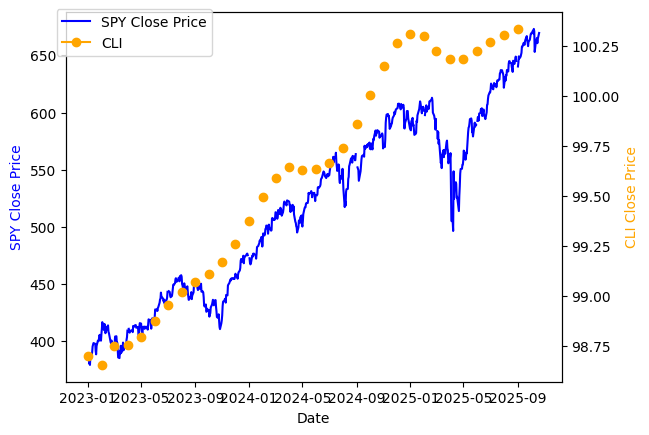

In [24]:
fig, ax1 = plt.subplots()
ax1.plot(plot_df.index, plot_df['close'], label='SPY Close Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('SPY Close Price', color='blue')
ax2 = ax1.twinx()
ax2.plot(plot_df.index, plot_df['CLI'], label='CLI', marker = 'o', color='orange')
ax2.set_ylabel('CLI Close Price', color='orange')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.show()